<a href="https://colab.research.google.com/github/CarolinaOliveira001/Complex_Network/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import files
uploaded = files.upload()

Saving 414.edges to 414 (1).edges


In [38]:
pip install node2vec==0.4.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import networkx as nx
from random import sample
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, accuracy_score
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import pandas as pd

In [70]:
filenameFacebook = "414.edges"

graphFacebook = nx.Graph()
trueGraphFacebook = nx.Graph()

with open(filenameFacebook) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphFacebook.nodes):
            graphFacebook.add_node(a)
            trueGraphFacebook.add_node(a)
        if b not in list(graphFacebook.nodes):
            graphFacebook.add_node(b)
            trueGraphFacebook.add_node(b)

        graphFacebook.add_edge(a, b)
        trueGraphFacebook.add_edge(a, b)

In [71]:
len(graphFacebook.edges())

1693

In [41]:
random_edges = set(sample(list(graphFacebook.edges()), int(round(graphFacebook.number_of_edges()*10/100, 0))))

In [42]:
for edge in random_edges:
  graphFacebook.remove_edge(edge[0], edge[1])

In [43]:
graphFacebookWithoutRemovedEdges = list(graphFacebook.edges())

# Homework 9

In [10]:
predictedModel = nx.adamic_adar_index(graphFacebook)

In [11]:
listOfPredictedEdges = []

for u, v, p in predictedModel:
    listOfPredictedEdges.append((u, v, p))

In [12]:
listOfPredictedEdges = sorted(listOfPredictedEdges, key=lambda tup: tup[2], reverse=True)

In [13]:
highestAdamicAdarModel = listOfPredictedEdges[0][2]

In [14]:
listOfProbabilityEdges = []

for (a, b, p) in listOfPredictedEdges:
  listOfProbabilityEdges.append([(a, b), p/highestAdamicAdarModel])

In [15]:
completetrueGraphFacebook = nx.complete_graph(trueGraphFacebook.nodes())

In [16]:
listOfAllPossibleEdges = list(completetrueGraphFacebook.edges())

In [17]:
for edge in graphFacebookWithoutRemovedEdges:
  listOfAllPossibleEdges.remove(edge)

In [18]:
listOfTrueGraphFacebooksEdges = []

for edge in listOfAllPossibleEdges:
  if edge in list(trueGraphFacebook.edges()):
    listOfTrueGraphFacebooksEdges.append(1)
  else:
    listOfTrueGraphFacebooksEdges.append(0)

In [19]:
listOfProbabilityGraphFacebooksEdges = []

for edgeA in listOfAllPossibleEdges:
  valueHelper = []
  for idx in range(0, len(listOfProbabilityEdges)):
    edgeB = listOfProbabilityEdges[idx][0]
    if edgeA == edgeB:
      valueHelper.append(listOfProbabilityEdges[idx][1])
    
  if len(valueHelper) == 0:
    listOfProbabilityGraphFacebooksEdges.append(0)
  else:
    listOfProbabilityGraphFacebooksEdges.append(valueHelper[0])

In [20]:
listOfGraphFacebooksEdges = []

for edgeA in listOfAllPossibleEdges:
  valueHelper = []
  for idx in range(0, len(listOfProbabilityEdges)):
    edgeB = listOfProbabilityEdges[idx][0]
    if edgeA == edgeB:
      if listOfProbabilityEdges[idx][1] > 0.5:
        valueHelper.append(1)
      else:
        valueHelper.append(0)
  
  if(len(valueHelper) == 0):
    listOfGraphFacebooksEdges.append(0)
  else:
    listOfGraphFacebooksEdges.append(valueHelper[0])

In [21]:
precision = precision_score(listOfTrueGraphFacebooksEdges, listOfGraphFacebooksEdges)

In [22]:
print(f'Precision: {precision}')

Precision: 0.4017857142857143


In [23]:
accuracy = accuracy_score(listOfTrueGraphFacebooksEdges, listOfGraphFacebooksEdges)

In [24]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9802093047352606


In [25]:
complementOfSpecificity, sensitivity, __ = roc_curve(listOfTrueGraphFacebooksEdges, listOfProbabilityGraphFacebooksEdges)

In [26]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

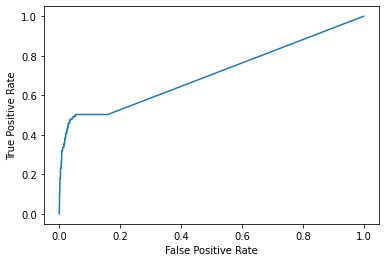

In [27]:
plot_roc_curve(complementOfSpecificity, sensitivity)

In [28]:
print(f'AUC score: {roc_auc_score(listOfTrueGraphFacebooksEdges, listOfProbabilityGraphFacebooksEdges)}')

AUC score: 0.7061988520135941


#Homework 10

In [44]:
node2vec = Node2Vec(graphFacebook, dimensions=64, seed = 42)

Computing transition probabilities:   0%|          | 0/150 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 10.99it/s]


In [45]:
model = node2vec.fit(vector_size= 64, min_count=1, batch_words=4)

In [46]:
node_embeddings = (model.wv.vectors) 

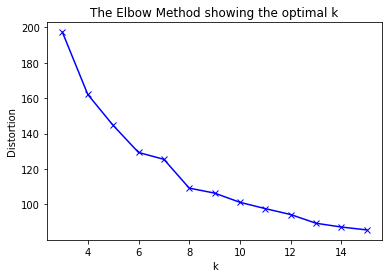

In [47]:
distortions = []
K = range(3,16)
for k in K:
    k_cluster = KMeans(n_clusters=k, max_iter=500, random_state=3425).fit(node_embeddings)
    k_cluster.fit(node_embeddings)
    distortions.append(k_cluster.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [60]:
elbow_number = 7

In [61]:
kmeans_cluster = KMeans(n_clusters=elbow_number, 
                        init='k-means++', n_init=300, random_state=3425).fit(node_embeddings)
kmeans_labels = kmeans_cluster.labels_

In [49]:
print(kmeans_labels)

[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 3 2 4 1 0 2 0 1 2 2 0 2 0 2 2 3 2 0 2 1 1 2 1 2 0 6
 6 2 0 0 0 2 2 2 2 2 1 0 2 2 1 3 2 0 2 2 2 0 3 0 1 0 0 3 0 0 0 1 1 1 0 0 0
 0 0 0 2 0 3 0 3 5 1 3 2 3 3 0 1 3 3 1 1 3 3 4 1 5 3 4 1 4 5 1 1 1 4 3 5 3
 4 0]


In [50]:
nodes_labels = pd.DataFrame(zip(graphFacebook.nodes(), kmeans_labels), columns = ['node_ids','kmeans'])

In [51]:
nodes_labels

,node_ids,kmeans
0,650,1
1,647,1
2,461,1
3,544,1
4,614,1
...,...,...
145,648,3
146,679,5
147,667,3
148,642,4


In [52]:
len(nodes_labels)

150

In [63]:
dictCommunities = {}
for i in range(len(nodes_labels)):
  dictCommunities[nodes_labels.iloc[i]['node_ids']] = nodes_labels.iloc[i]['kmeans']

In [56]:
def getList(dictOfValues, k):
  listOfValues = []
  for i in dictOfValues:
    if dictOfValues[i] == k:
      listOfValues.append(i)
  return listOfValues

In [62]:
listOfListCommunities = []
for k in range(elbow_number):
  listOfListCommunities.append(getList(dictCommunities, k))

In [67]:
for el in listOfListCommunities:
  for u in el:
    for v in el:
      if u != v and (u, v) not in graphFacebook.edges():
        graphFacebook.add_edge(u, v)

In [69]:
len(graphFacebook.edges())

3906